# Apply your skills

## Instructions

So far, you have worked with the Minnesota birds dataset to discover information about bird quantities and population density. Practice your application of these techniques by trying a different dataset, perhaps sourced from [Kaggle](https://www.kaggle.com/). Build a notebook to tell a story about this dataset, and make sure to use histograms when discussing it.

## Solution

In this assignment, I'll explore the data science job salaries dataset: available [here](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).

First, I import all neccessary libraries and load the dataset.

In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
ds_salaries = pd.read_csv('../../data/ds_salaries.csv')
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Next, I look at the dataset closely to determine which insights I can derive from it.

In [2]:
print(ds_salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


Now that I'm familiar with the variables, I'll look at the distribution of `salary_in_usd` to understand it's spread.

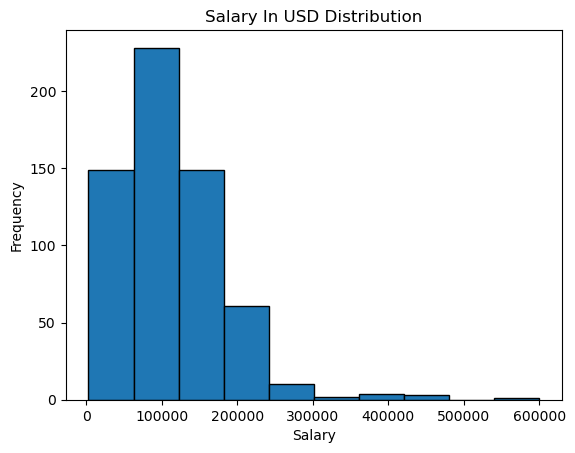

In [3]:
plt.hist(ds_salaries['salary_in_usd'], bins=10, edgecolor='black')
plt.title('Salary In USD Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most data science salaries are concentrated at the lower end of the salary range, with a long tail towards higher salaries. This suggests that while a few roles offer very high salaries, the majority of positions pay more modestly.

This dataset also includes good information about the job title, experience level, employment type, employee residence, and company size as well as the company location. Let's explore the different experience levels, and company sizes.

In [4]:
print(f"Experiece levels: {ds_salaries['experience_level'].unique()}")
print(f"Company sizes: {ds_salaries['company_size'].unique()}")

Experiece levels: ['MI' 'SE' 'EN' 'EX']
Company sizes: ['L' 'S' 'M']


In the dataset, several acronyms are used to describe experience level. Here are the full meanings of the acronyms:
* EN – Entry-level
* MI – Mid-level
* SE – Senior-level
* EX – Executive-level

Let's dig deeper into the experience level and company size information. What is the distribution of the salary in USD according to their experience level and company size?

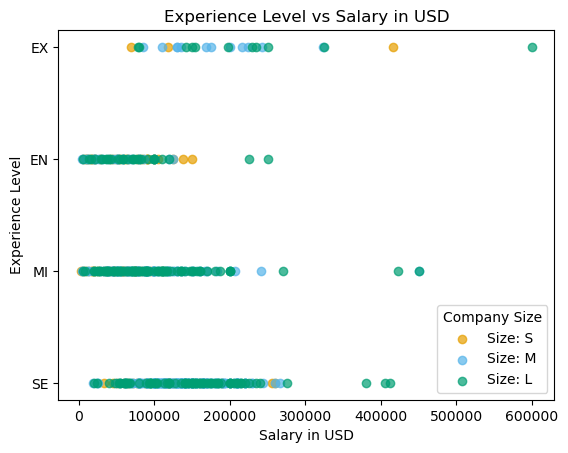

In [5]:
# Colorblind-friendly palette
color_map = {
    'S': '#E69F00',  # orange
    'M': '#56B4E9',  # sky blue
    'L': '#009E73'   # bluish green
}

# Plot each company size separately
for size in ['S', 'M', 'L']:
    subset = ds_salaries[ds_salaries['company_size'] == size]
    plt.scatter(
        subset['salary_in_usd'],
        subset['experience_level'],
        color=color_map[size],
        label=f'Size: {size}',
        alpha=0.7
    )

# Labels and legend
plt.title('Experience Level vs Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.legend(title='Company Size')
plt.show()


The visualization shows that higher experience levels generally correspond to higher salaries, regardless of company size. However, larger companies ('L') tend to offer higher salaries across all experience levels compared to medium ('M') and small ('S') companies. This suggests that both experience and company size play significant roles in determining salary levels in data science roles.